## 1. 웹브라우저 컨트롤 및 경기도 푸라닭 치킨집 정보 수집

In [1]:
from selenium import webdriver # 구글 크롬 웹드라이버 설치 요망 / # selenium : 크롤링 할 때 필요한 
from bs4 import BeautifulSoup
import pandas as pd
import time

In [17]:
# webdriver 실행  
driver = webdriver.Chrome(r'C:\Users\jun\datasalon\chromedriver.exe')

# 스타벅스의 지역별 매장 검색 화면에 접속
url = 'https://puradakchicken.com/startup/store.asp'
driver.get(url)
driver.execute_script('document.querySelector("div#quick_btm").remove()')

In [18]:
# webdriver로 ‘경기’버튼 찾아서 클릭 (1페이지)
driver.find_element_by_xpath("//select/option[@value='9']").click()

# reference : https://stackoverflow.com/questions/11343017/how-to-click-an-option-element-with-webdriver

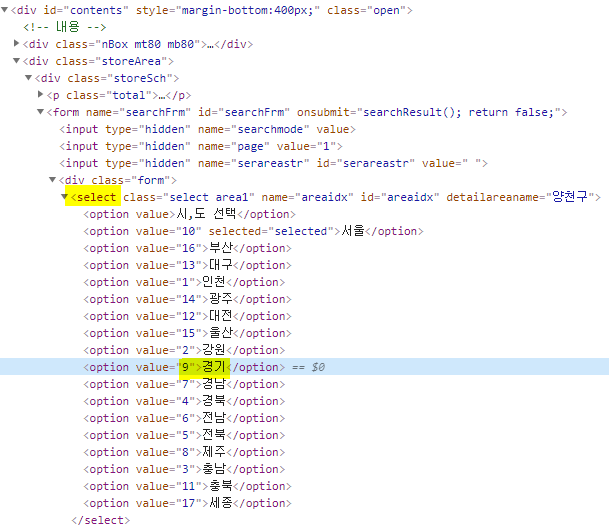

In [19]:
# html 가공을 위해 parser 만들기
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [20]:
puradak_doro_list = soup.select('span.doro') # 1페이지만의 갯수..
print(len(puradak_doro_list))

puradak_store_name = soup.select('p.name')
print(str(puradak_store_name[0]).split('</p>')[0].split('>')[1])

20
파주운정점


In [7]:
print(str(puradak_doro_list[0]).split('</span>')[0].split('>')[1])

경기도 파주시 와석순환로 380 (목동동,해솔마을6단지아파트) 


In [8]:
puradak_store_tel = soup.select('p.tel')
print(str(puradak_store_tel[0]).split(':')[1].split('<')[0])

 031-941-8898


In [9]:
puradak_soup_list = soup.select('span.dView')
print(str(puradak_soup_list[0]).split('<')[1].split('"'))
# print(len(puradak_soup_list))

['span class=', 'dView', ' datlatx=', '126.748754467634', ' datlaty=', '37.7230598623311', ' style=', 'cursor:pointer;', '>\n']


In [10]:
puradak_soup_list = soup.select('span.dView')
print(str(puradak_soup_list))

[<span class="dView" datlatx="126.748754467634" datlaty="37.7230598623311" style="cursor:pointer;">
<p class="name">파주운정점</p>
<p class="juso">
<span class="jibun"> </span>
<span class="doro">경기도 파주시 와석순환로 380 (목동동,해솔마을6단지아파트) </span>
<span class="disNone note1">매일: 16:00~22:30</span>
<span class="disNone note2"></span>
<span class="disNone note3"></span>
<span class="disNone note4"></span>
<span class="disNone imgSrc"></span>
</p>
<p class="tel">연락처 : 031-941-8898</p>
</span>, <span class="dView" datlatx="127.053593907454" datlaty="37.2476091824933" style="cursor:pointer;">
<p class="name">수원망포점</p>
<p class="juso">
<span class="jibun"> </span>
<span class="doro">경기도 수원시 영통구 덕영대로1499번길 75, 2층(망포동) </span>
<span class="disNone note1">매일: 13:00~23:30 (준비시간: 16:00~16:30)</span>
<span class="disNone note2"></span>
<span class="disNone note3"></span>
<span class="disNone note4"></span>
<span class="disNone imgSrc"></span>
</p>
<p class="tel">연락처 : 031-203-5321</p>
</span>, <span class="dVie

In [11]:
print(str(puradak_soup_list[0]).split('<')[1].split('"')[3]) # datlatx

126.748754467634


In [12]:
print(str(puradak_soup_list[0]).split('<')[1].split('"')[5]) # datlaty

37.7230598623311


In [21]:
# 페이지 하나씩 자동으로 넘겨가면서 자료 긁어오기. 
items = []
prev_soup_str = ''

puradak_soup_list = soup.select('span.dView')
new_soup_str = str(puradak_soup_list)
while new_soup_str != prev_soup_str:
    for item in puradak_soup_list:
        items.append(item)

    try:
        driver.find_element_by_class_name('btn.next').click()
        time.sleep(2)
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        prev_soup_str = new_soup_str
        puradak_soup_list = soup.select('span.dView')
        new_soup_str = str(puradak_soup_list)
    except Exception as e:
        print(e)
        break

In [22]:
# puradak_list = []
# for item in puradak_soup_list:
#     name = str(item.select('p.name')[0]).split('</p>')[0].split('>')[1]
#     address = str(item.select('span.doro')[0]).split('</span>')[0].split('>')[1]
#     tel = str(item.select('p.tel')[0]).split(':')[1].split('<')[0]
#     lat = item.attrs.get('datlaty', 0)
#     lng = item.attrs.get('datlatx', 0)
# #     laty = str(item.select('span.dView')[0]).split('<')[1].split('"')[5]
# #     latx = str(item.select('span.dView')[0]).split('<')[1].split('"')[3]
    
#     puradak_list.append([name, address, tel, lat, lng])
    
puradak_list = []
for item in items:
    name = str(item.select('p.name')[0]).split('</p>')[0].split('>')[1]
    address = str(item.select('span.doro')[0]).split('</span>')[0].split('>')[1]
    tel = str(item.select('p.tel')[0]).split(':')[1].split('<')[0]
    lat = item.attrs.get('datlaty', 0)
    lng = item.attrs.get('datlatx', 0)
#     laty = str(item.select('span.dView')[0]).split('<')[1].split('"')[5]
#     latx = str(item.select('span.dView')[0]).split('<')[1].split('"')[3]
    
    puradak_list.append([name, address, tel, lat, lng])

In [23]:
columns = ['매장명', '주소', '전화번호', '위도', '경도']
gyeunggi_puradak_df = pd.DataFrame(puradak_list, columns = columns)
gyeunggi_puradak_df

,매장명,주소,전화번호,위도,경도
0,파주운정점,"경기도 파주시 와석순환로 380 (목동동,해솔마을6단지아파트)",031-941-8898,37.7230598623311,126.748754467634
1,수원망포점,"경기도 수원시 영통구 덕영대로1499번길 75, 2층(망포동)",031-203-5321,37.2476091824933,127.053593907454
2,남양주오남점,경기도 남양주시 오남읍 진건오남로 511(오남리),031-529-9658,37.6797734731818,127.209168450433
3,부천중동점,"경기도 부천시 신흥로 150-1, 107호(중동,위브더스테이트8동)",032-620-5882,37.4978188552344,126.778844328395
4,일산벨라시타점,"경기도 고양시 일산동구 강송로 33, A-1110호 (백석동)",031-849-5709,37.6440712087641,126.792801047835
...,...,...,...,...,...
148,일산풍산점,"경기 고양시 일산동구 숲속마을로 18 (풍동, 웰빙타운)",031-908-9206,37.6672470221554,126.801482501159
149,김포고촌점,경기 김포시 고촌읍 은행영사정로 33 (신곡리),031-989-9206,37.6024355053605,126.77405562716
150,수원평동점,경기 수원시 권선구 오목천로57번길 10-24 (오목천동),031-294-9206,37.2403961718263,126.9696380051
151,일산마두점,"경기 고양시 일산동구 강송로 180 (마두동, 백마프라자)",031-8073-9207,37.6547234963653,126.783803243559


In [16]:
gyeunggi_puradak_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   매장명     153 non-null    object
 1   주소      153 non-null    object
 2   전화번호    153 non-null    object
 3   위도      153 non-null    object
 4   경도      153 non-null    object
dtypes: object(5)
memory usage: 6.1+ KB


In [76]:
# 엑셀로 저장
gyeunggi_puradak_df.to_excel('./files/puradak_list.xlsx', index=False, engine='openpyxl')